In this assessment, you will load a dataset and train a logistic regression classifier using the techniques discussed in the lesson to measure the performance. You'll be using the [Statlog Shuttle](http://archive.ics.uci.edu/ml/datasets/Statlog+%28Shuttle%29) dataset from UCI. Start by accessing the dataset directly to train your classifier.

# The dataset

Each record contains nine numerical attributes. The 10th column is the target column. There are two classes to predict; they are called `positive` and `negative`.

# 1. Import necessary packages
For this exercise, you'll need the following packages:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report, roc_curve, precision_recall_curve, roc_auc_score
from sklearn.utils.multiclass import unique_labels

# 2. Load and prepare the dataset
1. Load the training data into a DataFrame named `df_train_data`.
1. Create binary classification problem; rename some class labels.
1. Create a DataFrame of nine features named `X`, drop column 9.
1. Create a DataFrame of labels named `y`, select only column 9.
1. Split the data into a training set and a test set.

In [2]:
# Load the training data into a DataFrame
df_train_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/shuttle/shuttle.tst', header=None, sep=' ')

# Create binary classification problem; rename some class labels.
df_train_data[9] = np.where(df_train_data[9] == 1, 1, 0)

# Create a DataFrame of nine features named `X`, drop column 9.
X = df_train_data.drop([9], axis = 1)

# Create a DataFrame of labels named `y`, select only column 9.
y = df_train_data[9]

# Split the data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y)

print('There are {:d} training samples and {:d} test samples'.format(X_train.shape[0], X_test.shape[0]))


There are 10875 training samples and 3625 test samples


# 3. Create the model

1. Instantiate a logistic regression classifier with an `lbfgs` solver.
1. Fit the classifier to the data.

In [3]:
# Instantiate a logistic regression classifier with an `lbfgs` solver.
lr = LogisticRegression(solver = 'lbfgs')
lr.fit(X_train, y_train)
lr.coef_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 1.86752817e+00, -2.03400043e-02, -1.31437223e+00,
         2.45890260e-01, -8.18067940e-01,  4.17240120e-04,
         1.88115402e+00, -5.31860014e-01, -4.37870647e-01]])

In [4]:
# To avoid the warning sign, we will set `max_iter` higher.
# To get a consistent value, we will use random_state.
lr = LogisticRegression(solver = 'lbfgs', max_iter = 1000, random_state = 50)
lr.fit(X_train, y_train)
lr.coef_

array([[ 2.13269595e-01,  2.69472599e-03, -2.36476335e-01,
         2.90254011e-02, -4.94963176e-01, -3.30764134e-04,
         9.96236131e-01, -8.19620063e-01,  1.25813631e-01]])

# 4. Calculate accuracy
Calculate and print the accuracy of the model on the test data.

In [5]:
# Accuracy of the model:
accuracy = lr.score(X_test, y_test)

print("The logistic regression classifier model has the accuracy of {:.3f}.".format(accuracy))

The logistic regression classifier model has the accuracy of 0.974.


# 5. Dummy classifier

Use the dummy classifier to calculate the accuracy of a purely random chance.

Compare this result to the result of the logistic regression classifier above. What does this result tell you?



In [6]:
# Dummy classifier accuracy: 
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy_score = dummy.score(X_test, y_test)

print("The dummy classifier has the accuracy of {:.3f}.".format(dummy_score))

The dummy classifier has the accuracy of 0.790.


### Compared to the logistic regression classifier accuracy of 0.969, the dummy classifier accuracy of 0.792 is lower. This tells me that I may have a large class imbalance.

# 6. Confusion matrix
Print the confusion matrix.

In [7]:
predictions = lr.predict(X_test)

confusion = confusion_matrix(y_test, predictions, labels = [1, 0])
print(confusion)


[[2828   37]
 [  57  703]]


# 7. Plot a nicer confusion matrix (optional)
Use the `plot_confusion_matrix()` function from above to plot a nicer-looking confusion matrix.

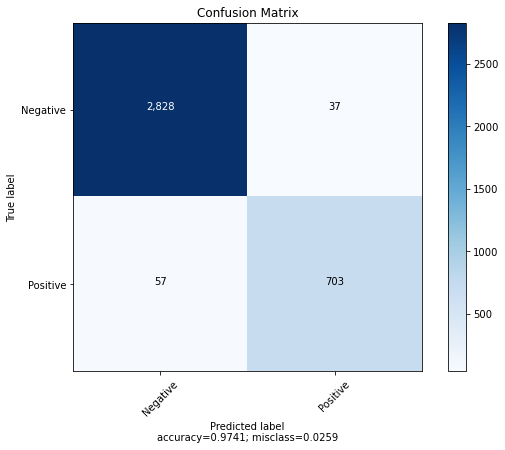

In [8]:
def plot_confusion_matrix(cm, target_names, title = 'Confusion Matrix',
                         cmap = None, normalize = True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    
    if cmap is None:
        cmap = plt.get_cmap('Blues')
        
    plt.figure(figsize = (8, 6))
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation = 45)
        plt.yticks(tick_marks, target_names)
        
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]), horizontalalignment = 'center',
                    color = 'white' if cm[i, j] > thresh else 'black')
            
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]), horizontalalignment = 'center',
                    color = 'white' if cm[i, j] > thresh else 'black')
    

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
plot_confusion_matrix(cm=confusion, target_names = ['Negative', 'Positive'], 
                 title = 'Confusion Matrix', normalize = False)

# 8. Calculate metrics
Print the F₁, Fᵦ, precision, recall, and accuracy scores.

In [9]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, beta = 0.5)
fbeta_recall = fbeta_score(y_test, predictions, beta = 2)

print('Accuracy score: {:.3f}'.format(accuracy))
print('Precision score: {:.3f}'.format(precision))
print('Recall score: {:.3f}'.format(recall))
print('F1 score: {:.3f}'.format(f1))
print('Fbeta score favoring precision: {:.3f}'.format(fbeta_precision))
print('Fbeta score favoring recall: {:.3f}'.format(fbeta_recall))

Accuracy score: 0.974
Precision score: 0.980
Recall score: 0.987
F1 score: 0.984
Fbeta score favoring precision: 0.982
Fbeta score favoring recall: 0.986


# 9. Print a classification report

In [10]:
report = classification_report(y_test, predictions, target_names = ['Negative', 'Positive'])
print(report)

              precision    recall  f1-score   support

    Negative       0.95      0.93      0.94       760
    Positive       0.98      0.99      0.98      2865

    accuracy                           0.97      3625
   macro avg       0.97      0.96      0.96      3625
weighted avg       0.97      0.97      0.97      3625



# 10. Plot the ROC curve and AUC
Calculate AUC and plot the curve.

Area under the ROC curve: 0.992


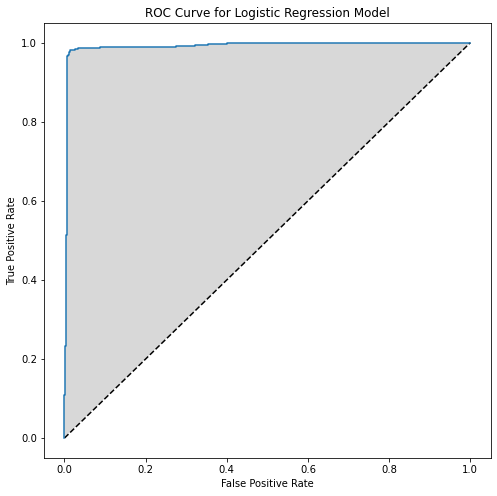

In [11]:
probs = lr.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probs)

auc = roc_auc_score(y_test, probs)
print('Area under the ROC curve: {:.3f}'.format(auc))

fig = plt.figure(figsize = (8, 8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.fill(fpr, tpr, 'grey', alpha = 0.3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model')
plt.show()

# 11. Plot precision-recall curve

Plot the precision-recall curve for the model above.

Find the best value for `C` in the logistic regression classifier for avoiding overfitting. Plot the training and testing accuracy over a range of `C` values from `0.05` to `1.5`.

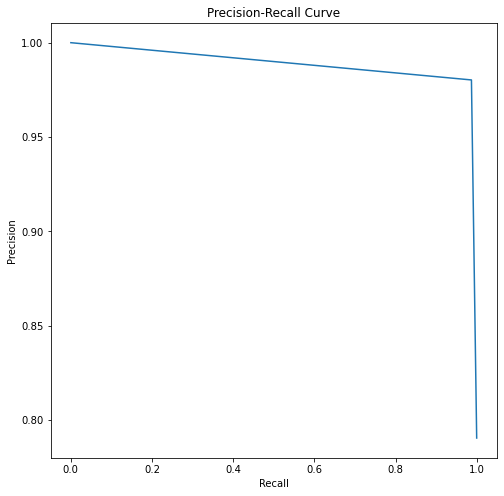

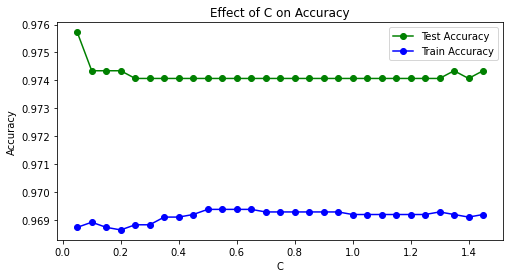

Best value for C: 0.05
Best test accuracy: 0.976


In [12]:
# Plot the precision-recall curve:
pres, rec, thresholds = precision_recall_curve(y_test, predictions)
fig = plt.figure(figsize = (8, 8))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Find the best value for C for avoiding overfitting.
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
    clr = LogisticRegression(solver='lbfgs', C=c, max_iter=1000, random_state = 50)
    clr.fit(X_train, y_train)
    test_accuracy.append(clr.score(X_test, y_test))
    train_accuracy.append(clr.score(X_train, y_train))
    
fig = plt.figure(figsize = (8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', marker = 'o', label = 'Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', marker = 'o', label = 'Train Accuracy')
ax1.set(xlabel = 'C', ylabel = 'Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

best_test_accuracy = max(test_accuracy)
print(f"Best value for C: {c_vals[test_accuracy.index(best_test_accuracy)]}")
print(f"Best test accuracy: {round(best_test_accuracy, 3)}")      
      

# 12. Cross-validation

Perform fivefold cross-validation for a logistic regression classifier. Print the five accuracy scores and the mean validation score.

In [13]:
flf = LogisticRegression(solver='lbfgs', max_iter=1000, random_state = 50)
cv_scores = cross_val_score(flf, X_train, y_train, cv = 5)

print('Accuracy scores for the five folds: ', cv_scores)
print('Mean cross-validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the five folds:  [0.9645977  0.96505747 0.97011494 0.97241379 0.97241379]
Mean cross-validation score: 0.969


# 13. Is this really linear?

Your linear classifier is not giving you better accuracy than the dummy classifier. Suppose that the data was not linearly separable. Instantiate and train a KNN model with k = 7. How does the accuracy of the KNN model compare to the logistic regression from above? What does that tell you about the data?


In [14]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)

knn_7_score = knn.score(X_test, y_test)
knn_7_predictions = knn.predict(X_test)

print('Accuracy of KNN (k = 7): {:.3f}'.format(knn_7_score))

Accuracy of KNN (k = 7): 0.998


### The logistic regression model had the accuracy of 0.974. The KNN accuracy is slightly higher at 0.998. 

# 14. Random forest
Next, instantiate and fit a random forest classifier and calculate the accuracy of that model.



In [15]:
rf = RandomForestClassifier(n_estimators = 2, random_state = 50)
rf.fit(X_train, y_train)

rf_score = rf.score(X_test, y_test)
rf_predictions = rf.predict(X_test)

print('Accuracy of Random Forest: {:.3f}'.format(rf_score))

Accuracy of Random Forest: 0.999
